### Stock Price Trend Prediction


### Importing libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset


In [3]:
# Load Tesla stock data
df = pd.read_csv('TSLA dataset.csv')


###  Basic Functions

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30-06-2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01-07-2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02-07-2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06-07-2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3675,06-02-2025,373.029999,375.399994,363.179993,374.320007,374.320007,77918200
3676,07-02-2025,370.190002,380.549988,360.339996,361.619995,361.619995,70298300
3677,10-02-2025,356.209992,362.700012,350.510010,350.730011,350.730011,77514900
3678,11-02-2025,345.799988,349.369995,325.100006,328.500000,328.500000,118543400
3679,12-02-2025,329.940002,346.399994,329.119995,336.510010,336.510010,104520600


In [6]:
df.shape

(3680, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3680 non-null   object 
 1   Open       3677 non-null   float64
 2   High       3675 non-null   float64
 3   Low        3674 non-null   float64
 4   Close      3674 non-null   float64
 5   Adj Close  3675 non-null   float64
 6   Volume     3680 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 201.4+ KB


In [8]:
# 2. Show basic statistics
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  3677.000000  3675.000000  3674.000000  3674.000000  3675.000000   
mean     83.989503    85.882109    82.079901    84.028958    84.006930   
std     110.711734   113.206154   108.005299   110.636499   110.629496   
min       1.076000     1.108667     0.998667     0.000000     1.053333   
25%      12.237333    12.464000    12.020000    12.240833    12.232000   
50%      18.173332    18.533333    17.890000    18.254000    18.240000   
75%     182.000000   185.195000   177.367504   181.355003   181.300003   
max     475.899994   488.540008   457.510010   479.859985   479.859985   

             Volume  
count  3.680000e+03  
mean   9.652863e+07  
std    7.746858e+07  
min    1.777500e+06  
25%    4.918238e+07  
50%    8.195580e+07  
75%    1.217434e+08  
max    9.140820e+08  


In [9]:
# 3. Show column names
print("Columns:", df.columns)

Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [10]:
# 4. Show data types
print("Data Types:\n", df.dtypes)

Data Types:
 Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [11]:
# 5. Show null value count
print("Null values in each column:\n", df.isnull().sum())

Null values in each column:
 Date         0
Open         3
High         5
Low          6
Close        6
Adj Close    5
Volume       0
dtype: int64


In [12]:
# 6. Unique values in each column
for col in df.columns:
    print(f"{col} has {df[col].nunique()} unique values")


Date has 3680 unique values
Open has 3364 unique values
High has 3360 unique values
Low has 3375 unique values
Close has 3470 unique values
Adj Close has 3470 unique values
Volume has 3649 unique values


In [13]:
# 7. Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [14]:
# 8. Correlation matrix
print("Correlation matrix:\n", df.corr(numeric_only=True))

Correlation matrix:
                Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999719  0.999627  0.999218   0.999218  0.084480
High       0.999719  1.000000  0.999637  0.999645   0.999645  0.087676
Low        0.999627  0.999637  1.000000  0.999688   0.999688  0.080813
Close      0.999218  0.999645  0.999688  1.000000   1.000000  0.084878
Adj Close  0.999218  0.999645  0.999688  1.000000   1.000000  0.085055
Volume     0.084480  0.087676  0.080813  0.084878   0.085055  1.000000


In [15]:
# 13. Count value frequency for Volume
print("Volume value counts:\n", df['Volume'].value_counts().head())

Volume value counts:
 Volume
76101000     2
17401500     2
9922500      2
134973000    2
33339000     2
Name: count, dtype: int64


In [16]:
# 14. Check Close column stats
print("Close stats:\n", df['Close'].describe())

Close stats:
 count    3674.000000
mean       84.028958
std       110.636499
min         0.000000
25%        12.240833
50%        18.254000
75%       181.355003
max       479.859985
Name: Close, dtype: float64


In [17]:
# 15. Check memory usage
print("Memory usage:\n", df.memory_usage())

Memory usage:
 Index          132
Date         29440
Open         29440
High         29440
Low          29440
Close        29440
Adj Close    29440
Volume       29440
dtype: int64


### Data Cleaning


In [18]:
# 1. Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipython-input-18-2172993501.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [19]:
# 2. Fill missing Volume with median
df['Volume'] = df['Volume'].fillna(df['Volume'].median())
print(df['Volume'])

0       281494500
1       257806500
2       123282000
3        77097000
4       103003500
          ...    
3675     77918200
3676     70298300
3677     77514900
3678    118543400
3679    104520600
Name: Volume, Length: 3680, dtype: int64


In [20]:
# Check if 'Adj Close' exists and drop it
if 'Adj Close' in df.columns:
    df = df.drop(columns=['Adj Close'])
    print("'Adj Close' column removed successfully.")
else:
    print("'Adj Close' column not found.")


'Adj Close' column removed successfully.


In [21]:
# 3. Drop any remaining null values
df.dropna(inplace=True)
print(df)

           Date        Open        High         Low       Close     Volume
0    2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500
1    2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500
2    2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000
3    2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000
4    2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500
...         ...         ...         ...         ...         ...        ...
3675 2025-02-06  373.029999  375.399994  363.179993  374.320007   77918200
3676 2025-02-07  370.190002  380.549988  360.339996  361.619995   70298300
3677 2025-02-10  356.209992  362.700012  350.510010  350.730011   77514900
3678 2025-02-11  345.799988  349.369995  325.100006  328.500000  118543400
3679 2025-02-12  329.940002  346.399994  329.119995  336.510010  104520600

[3661 rows x 6 columns]


### Feature Engineering

In [22]:
df['Open-Close'] = df['Open'] - df['Close']
print(df['Open-Close'])

0       -0.326000
1        0.130666
2        0.202667
3        0.253333
4        0.259333
          ...    
3675    -1.290008
3676     8.570007
3677     5.479981
3678    17.299988
3679    -6.570007
Name: Open-Close, Length: 3661, dtype: float64


In [23]:
df['High-Low'] = df['High'] - df['Low']
print(df['High-Low'] )

0        0.497334
1        0.474667
2        0.376667
3        0.292667
4        0.278000
          ...    
3675    12.220001
3676    20.209992
3677    12.190002
3678    24.269989
3679    17.279999
Name: High-Low, Length: 3661, dtype: float64


In [24]:
 #Create Target: 1 if next day's close > today's close, else 0
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
# Predict if price will go up next day (binary target)
print(df[['Close', 'Target']].head())


      Close  Target
0  1.592667       0
1  1.588667       0
2  1.464000       0
3  1.280000       0
4  1.074000       0


In [25]:
print(df)

           Date        Open        High         Low       Close     Volume  \
0    2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500   
1    2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500   
2    2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000   
3    2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000   
4    2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500   
...         ...         ...         ...         ...         ...        ...   
3675 2025-02-06  373.029999  375.399994  363.179993  374.320007   77918200   
3676 2025-02-07  370.190002  380.549988  360.339996  361.619995   70298300   
3677 2025-02-10  356.209992  362.700012  350.510010  350.730011   77514900   
3678 2025-02-11  345.799988  349.369995  325.100006  328.500000  118543400   
3679 2025-02-12  329.940002  346.399994  329.119995  336.510010  104520600   

      Open-Close   High-Low  Target  
0      -0.326000   0.4973

###  Features and Target

In [26]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Open-Close', 'High-Low']
X = df[features]
y = df['Target']

In [27]:
print(X)

            Open        High         Low       Close     Volume  Open-Close  \
0       1.266667    1.666667    1.169333    1.592667  281494500   -0.326000   
1       1.719333    2.028000    1.553333    1.588667  257806500    0.130666   
2       1.666667    1.728000    1.351333    1.464000  123282000    0.202667   
3       1.533333    1.540000    1.247333    1.280000   77097000    0.253333   
4       1.333333    1.333333    1.055333    1.074000  103003500    0.259333   
...          ...         ...         ...         ...        ...         ...   
3675  373.029999  375.399994  363.179993  374.320007   77918200   -1.290008   
3676  370.190002  380.549988  360.339996  361.619995   70298300    8.570007   
3677  356.209992  362.700012  350.510010  350.730011   77514900    5.479981   
3678  345.799988  349.369995  325.100006  328.500000  118543400   17.299988   
3679  329.940002  346.399994  329.119995  336.510010  104520600   -6.570007   

       High-Low  
0      0.497334  
1      0.474667

In [28]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
3675    0
3676    0
3677    0
3678    1
3679    0
Name: Target, Length: 3661, dtype: int64


###  Train-Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Logistic Regression Model

In [30]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [31]:
y_pred = model.predict(X_test)


### Evaluation

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5320600272851296
Confusion Matrix:
 [[  0 343]
 [  0 390]]


In [33]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.53      1.00      0.69       390

    accuracy                           0.53       733
   macro avg       0.27      0.50      0.35       733
weighted avg       0.28      0.53      0.37       733



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Visualization

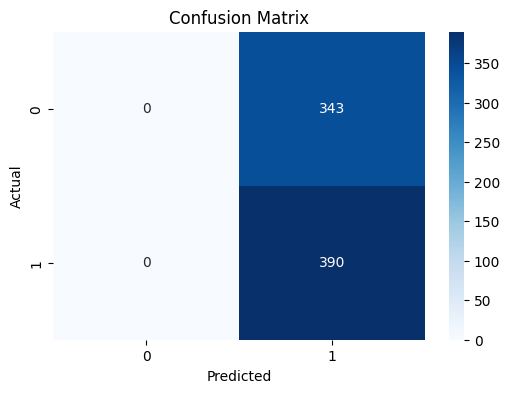

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

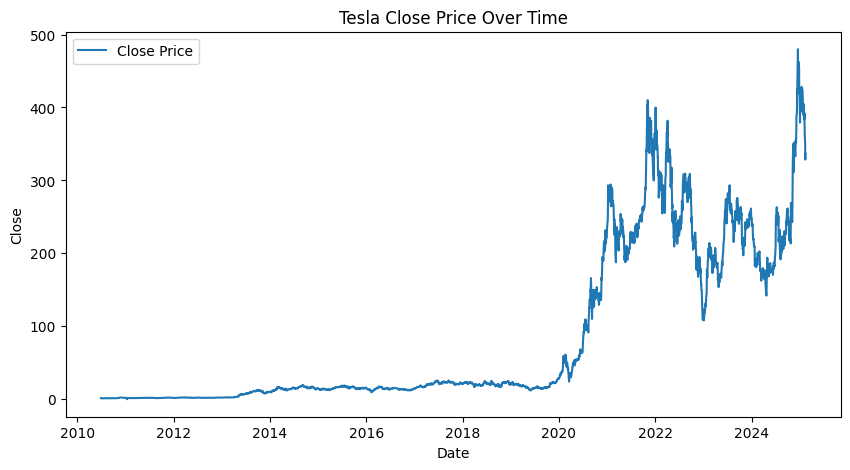

In [35]:
# Line plot of Close over time
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title("Tesla Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.show()

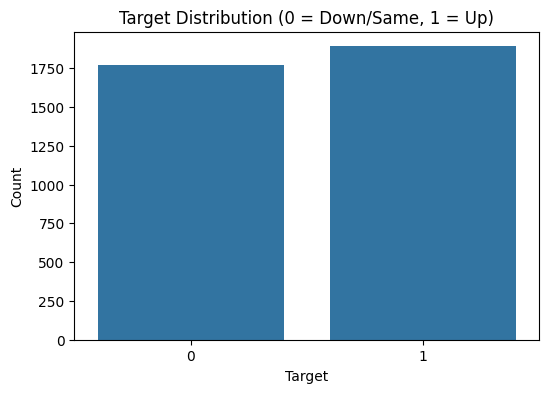

In [36]:
#Shows how many days the stock price went up (1) or down/same (0).
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df)
plt.title("Target Distribution (0 = Down/Same, 1 = Up)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

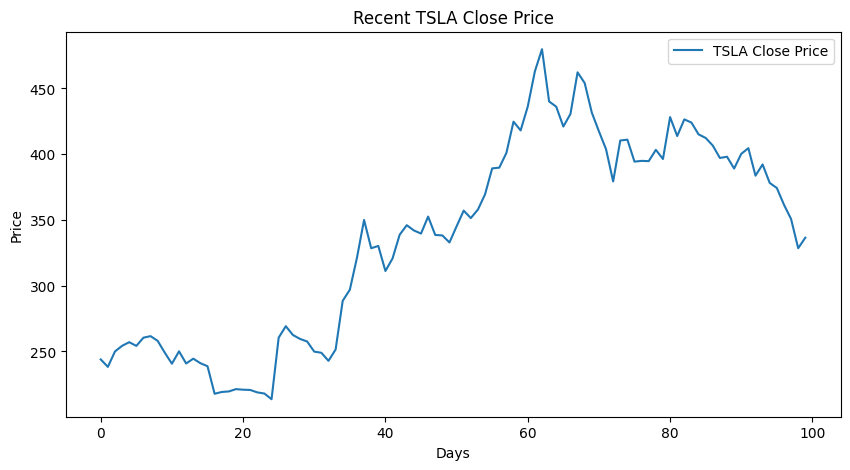

In [37]:
# Optional: plot Close prices and prediction results
plt.figure(figsize=(10,5))
plt.plot(df['Close'].tail(100).values, label='TSLA Close Price')
plt.title("Recent TSLA Close Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

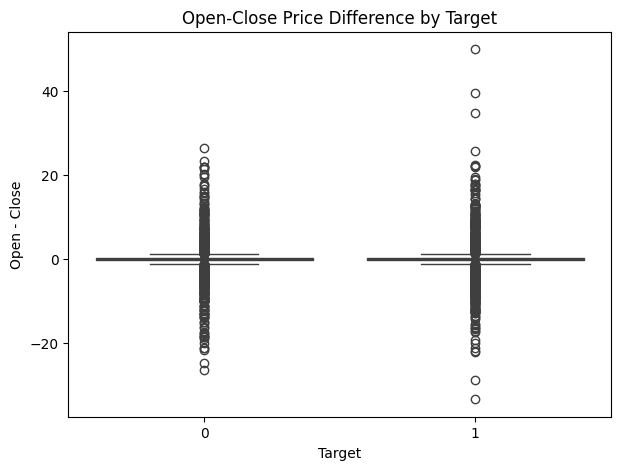

In [38]:
#Price volatility may relate to target class.
plt.figure(figsize=(7,5))
sns.boxplot(x='Target', y='Open-Close', data=df)
plt.title("Open-Close Price Difference by Target")
plt.xlabel("Target")
plt.ylabel("Open - Close")
plt.show()

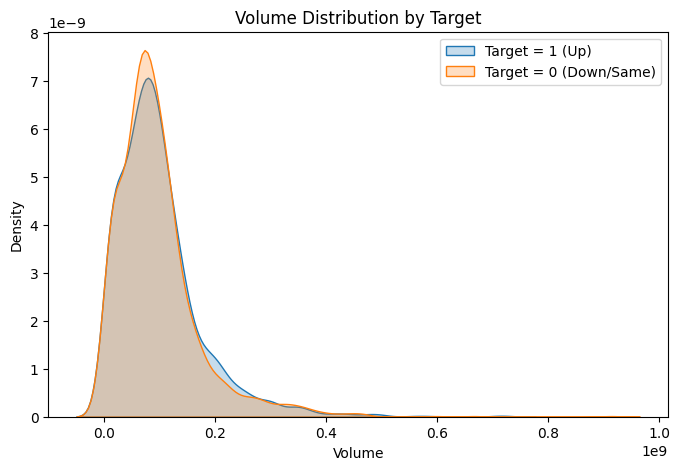

In [39]:
#Compares the distribution of trading Volume for both target classes.
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Target'] == 1]['Volume'], label='Target = 1 (Up)', fill=True)
sns.kdeplot(data=df[df['Target'] == 0]['Volume'], label='Target = 0 (Down/Same)', fill=True)
plt.title("Volume Distribution by Target")
plt.xlabel("Volume")
plt.legend()
plt.show()

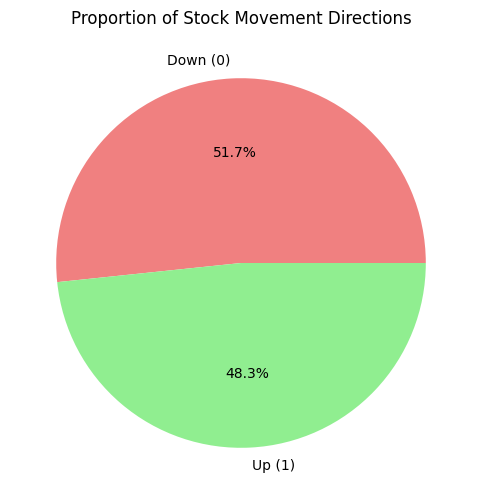

In [40]:
target_counts = df['Target'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=['Down (0)', 'Up (1)'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title("Proportion of Stock Movement Directions")
plt.show()

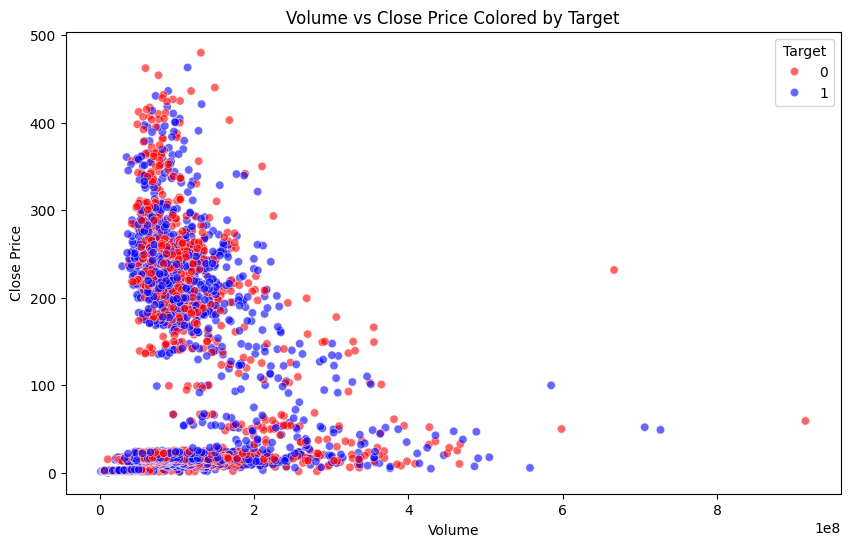

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Volume', y='Close', hue='Target', palette={0: 'red', 1: 'blue'}, alpha=0.6)
plt.title("Volume vs Close Price Colored by Target")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.legend(title="Target")
plt.show()

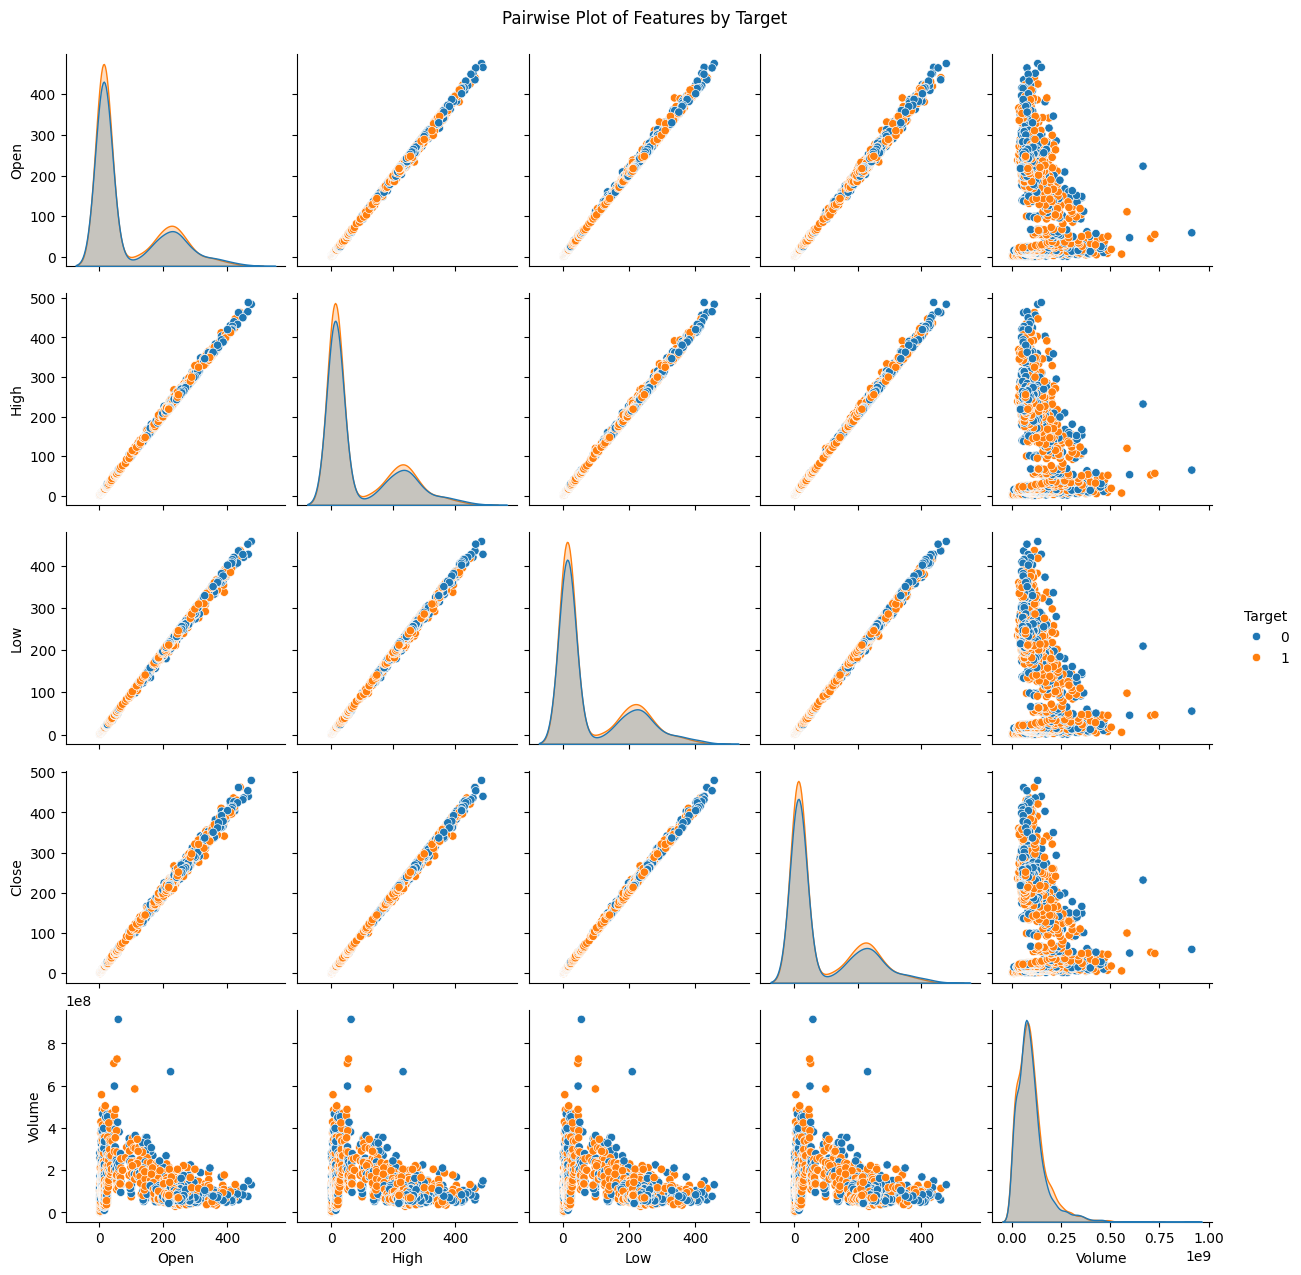

In [42]:
#Shows pairwise relationships between numerical features, colored by Target.
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Target']], hue='Target', diag_kind='kde')
plt.suptitle("Pairwise Plot of Features by Target", y=1.02)
plt.show()

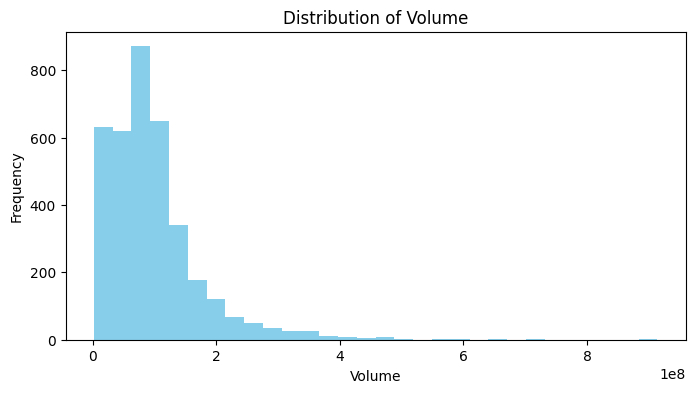

In [43]:

#  Histogram of Volume
plt.figure(figsize=(8,4))
plt.hist(df['Volume'], bins=30, color='skyblue')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()




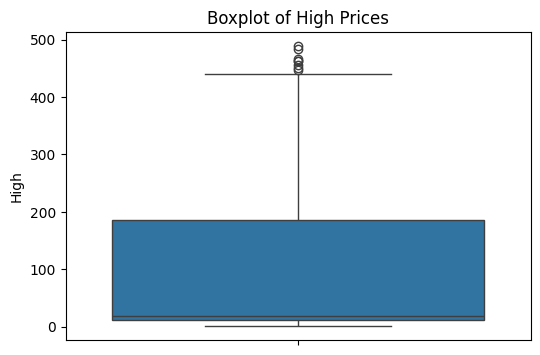

In [44]:
# 3. Boxplot of High Prices
plt.figure(figsize=(6,4))
sns.boxplot(y=df['High'])
plt.title('Boxplot of High Prices')
plt.show()



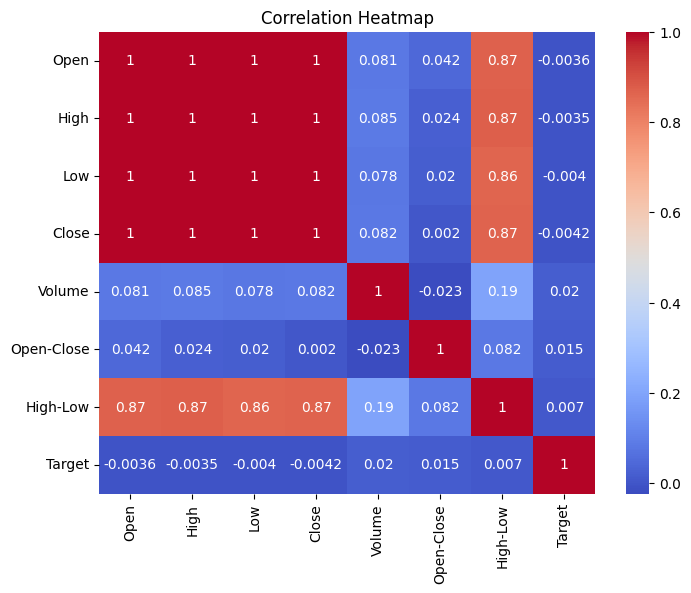

In [45]:
# 4. Heatmap of Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()